In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import shuffle
from utils import *
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Define a function to return some characteristics of the dataset
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    # Define a key "image_shape" and store the test image shape 3-tuple
    notcar_image = mpimg.imread(notcar_list[0])
    data_dict["image_shape"] = notcar_image.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = notcar_image.dtype
    # Return data_dict
    return data_dict

In [3]:
cars = []
notcars = []

extra_notcars_images = glob.glob('dataset/non-vehicles/Extras/*.png')
for image in extra_notcars_images:
    notcars.append(image)
    
    
gti_notcars_images = glob.glob('dataset/non-vehicles/GTI/*.png')
for image in gti_notcars_images:
    notcars.append(image)
    

gti_far_cars_images = glob.glob('dataset/vehicles/GTI_Far/*.png')
for image in gti_far_cars_images:
    cars.append(image)


gti_left_cars_images = glob.glob('dataset/vehicles/GTI_Left/*.png')
for image in gti_left_cars_images:
    cars.append(image)


gti_middleclose_cars_images = glob.glob('dataset/vehicles/GTI_MiddleClose/*.png')
for image in gti_middleclose_cars_images:
    cars.append(image)


gti_right_cars_images = glob.glob('dataset/vehicles/GTI_Right/*.png')
for image in gti_right_cars_images:
    cars.append(image)


kitti_cars_images = glob.glob('dataset/vehicles/KITTI_extracted/*.png')
for image in kitti_cars_images:
    cars.append(image)


sample_size = 2500
shuffle(cars)
shuffle(notcars)
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]
data_info = data_look(cars, notcars)

print('Your function returned a count of',
      data_info["n_cars"], ' cars and',
      data_info["n_notcars"], ' non-cars')
print('of size: ', data_info["image_shape"], ' and data type:',
      data_info["data_type"])

Your function returned a count of 2500  cars and 2500  non-cars
of size:  (64, 64, 3)  and data type: float32


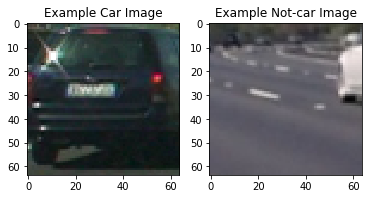

In [9]:
# Just for fun choose random car / not-car indices and plot example images
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure(figsize=(6, 4))
visualize(fig, 1, 2, [car_image, notcar_image],
          ['Example Car Image', 'Example Not-car Image'],
          ['gray', 'gray'])

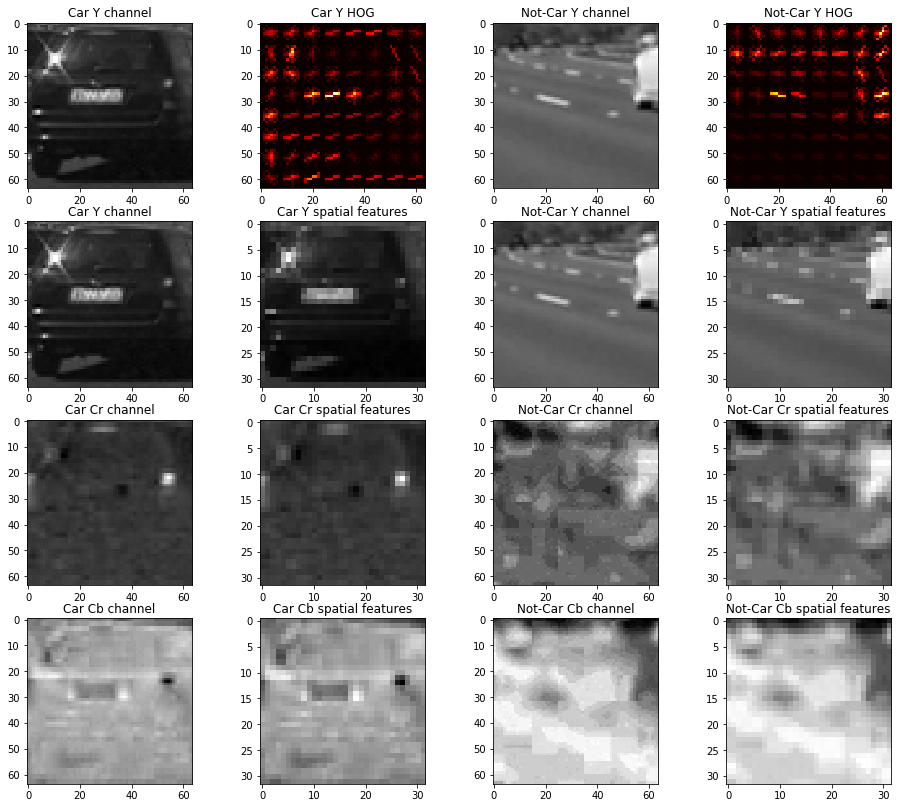

In [10]:
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
spatial_size = (32, 32)

car_feature_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
car_Y_channel = car_feature_image[:,:,0]
car_Cr_channel = car_feature_image[:,:,1]
car_Cb_channel = car_feature_image[:,:,2]
# Call our function with vis=True to see an image output
car_Y_features, car_Y_hog_image = get_hog_features(car_Y_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=True, feature_vec=True)
car_Cr_features = get_hog_features(car_Cr_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
car_Cb_features = get_hog_features(car_Cb_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
car_spatial_Y_feature = bin_spatial(car_Y_channel, spatial_size)
car_spatial_Cr_feature = bin_spatial(car_Cr_channel, spatial_size)
car_spatial_Cb_feature = bin_spatial(car_Cb_channel, spatial_size)

notcar_feature_image = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2YCrCb)
notcar_Y_channel = notcar_feature_image[:,:,0]
notcar_Cr_channel = notcar_feature_image[:,:,1]
notcar_Cb_channel = notcar_feature_image[:,:,2]
# Call our function with vis=True to see an image output
notcar_Y_features, notcar_Y_hog_image = get_hog_features(notcar_Y_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=True, feature_vec=True)
notcar_Cr_features = get_hog_features(notcar_Cr_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
notcar_Cb_features = get_hog_features(notcar_Cb_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
notcar_spatial_Y_feature = bin_spatial(notcar_Y_channel, spatial_size)
notcar_spatial_Cr_feature = bin_spatial(notcar_Cr_channel, spatial_size)
notcar_spatial_Cb_feature = bin_spatial(notcar_Cb_channel, spatial_size)

fig = plt.figure(figsize=(16, 14))
vis_img_list = [car_Y_channel, car_Y_hog_image, notcar_Y_channel, notcar_Y_hog_image,
                car_Y_channel, car_spatial_Y_feature.reshape(spatial_size), notcar_Y_channel, notcar_spatial_Y_feature.reshape(spatial_size),
                car_Cr_channel, car_spatial_Cr_feature.reshape(spatial_size), notcar_Cr_channel, notcar_spatial_Cr_feature.reshape(spatial_size),
                car_Cb_channel, car_spatial_Cb_feature.reshape(spatial_size), notcar_Cb_channel, notcar_spatial_Cb_feature.reshape(spatial_size)]
vis_title_list = ['Car Y channel', 'Car Y HOG', 'Not-Car Y channel', 'Not-Car Y HOG',
                  'Car Y channel', 'Car Y spatial features', 'Not-Car Y channel', 'Not-Car Y spatial features',
                  'Car Cr channel', 'Car Cr spatial features', 'Not-Car Cr channel', 'Not-Car Cr spatial features',
                  'Car Cb channel', 'Car Cb spatial features', 'Not-Car Cb channel', 'Not-Car Cb spatial features']
cmap_list = ['gray', 'hot', 'gray', 'hot',
             'gray', 'gray', 'gray', 'gray',
             'gray', 'gray', 'gray', 'gray',
             'gray', 'gray', 'gray', 'gray']
visualize(fig, 4, 4, vis_img_list, vis_title_list, cmap_list)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import time
from utils import *

color_space = 'YCrCb'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hog_channel = "ALL"  # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32)  # Spatial binning dimensions
hist_bins = 32  # Number of histogram bins
spatial_feat = True  # Spatial features on or off
hist_feat = True  # Histogram features on or off
hog_feat = True  # HOG features on or off

car_features = extract_features(cars, color_space=color_space,
                                spatial_size=spatial_size, hist_bins=hist_bins,
                                orient=orient, pix_per_cell=pix_per_cell,
                                cell_per_block=cell_per_block,
                                hog_channel=hog_channel, spatial_feat=spatial_feat,
                                hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space,
                                   spatial_size=spatial_size, hist_bins=hist_bins,
                                   orient=orient, pix_per_cell=pix_per_cell,
                                   cell_per_block=cell_per_block,
                                   hog_channel=hog_channel, spatial_feat=spatial_feat,
                                   hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:', orient, 'orientations', pix_per_cell,
      'pixels per cell and', cell_per_block, 'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC
svc = LinearSVC()
# Check the training time for the SVC
t = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2 - t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

Using: 8 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7872
2.37 Seconds to train SVC...
Test Accuracy of SVC =  1.0
